In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
als_data = pd.read_csv("C:\\Users\\lahai\\Downloads\\als_data.csv")
print(als_data.head())

   ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0   1        65         57.0            40.5         38.0       0.066202   
1   2        48         45.0            41.0         39.0       0.010453   
2   3        38         50.0            47.0         45.0       0.008929   
3   4        63         47.0            44.0         41.0       0.012111   
4   5        63         47.0            45.5         42.0       0.008292   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  ...  \
0     -0.965608                30                 28.0                22  ...   
1     -0.921717                37                 33.0                21  ...   
2     -0.914787                24                 14.0                10  ...   
3     -0.598361                30                 29.0                24  ...   
4     -0.444039                32                 27.5                20  ...   

   Sodium_min  Sodium_range  SubjectID  trunk_max  trunk

In [9]:
als_data = als_data.drop(columns=['ID','SubjectID'])

In [11]:
als_data = als_data.dropna()

In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(als_data)

In [21]:
range_n_clusters = range(2, 10)
silhouette_scores = []

In [23]:
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

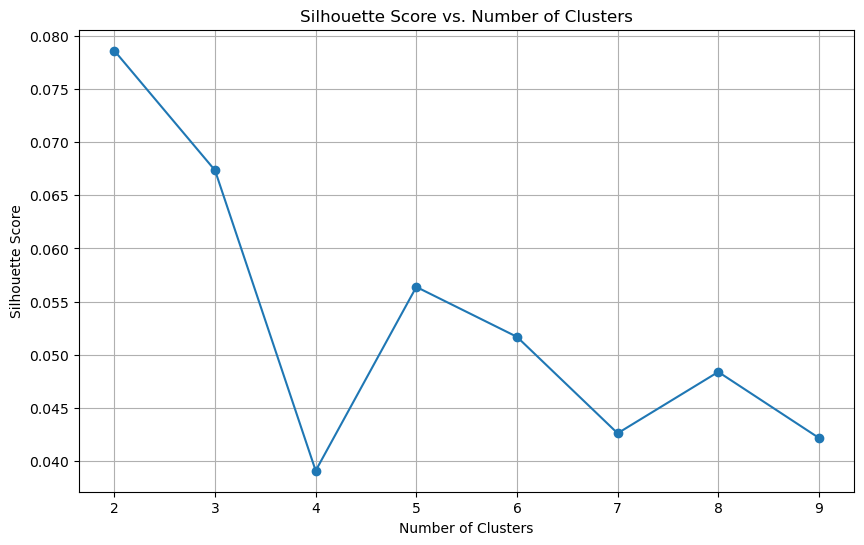

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [27]:
optimal_n_clusters = 4
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels= kmeans.fit_predict(scaled_data)

In [29]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [35]:
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1','PCA2'])
pca_df['Cluster'] = cluster_labels

In [37]:
import seaborn as sns

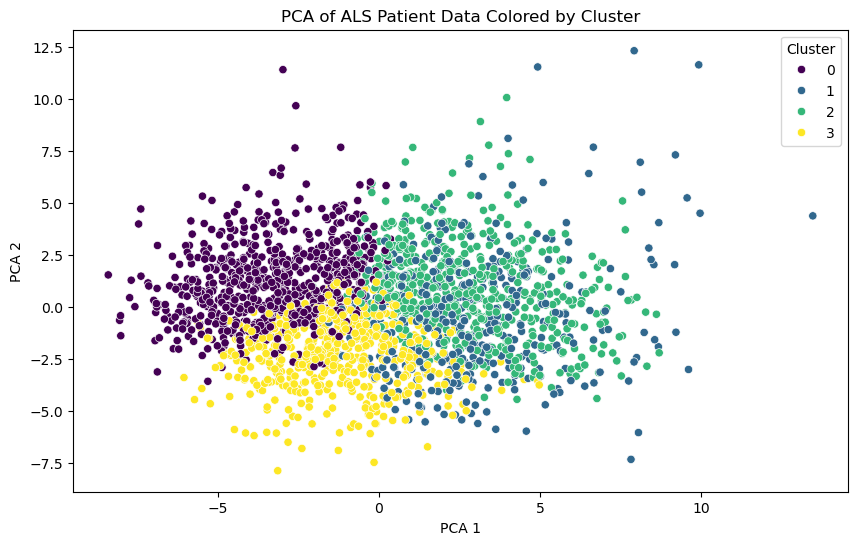

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA of ALS Patient Data Colored by Cluster')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

# Summary and Conclusion

This visualization shows a Silhouette score vs the number of clustering and a scatter plot of ALS patient data that has been reduced to two dimensions using Principal Component Analysis (PCA). Each point represents a patient, positioned according to their PCA1 and PCA2 values, and colored based on their cluster assignment.

## Conclusion
The scatter plot reveals distinct groupings of ALS patients, suggesting that:

1. There are identifiable subgroups within the ALS patient population
2. The clustering algorithm has successfully separated patients into different groups based on underlying patterns in their data
3. The first two principal components capture enough variance to show clear separation between these clusters
4. This visualization could help medical researchers identify different disease subtypes or patient profiles

The silhouette scores suggest that:
1. When it is close to 1 indicate better clusters with good separation.
2. It also shows that adding more clusters does not improve the clustering quality looking at the graph.
3. Sharp drops might indicate that a particular number of clusters forces unnatural groupings in the data.

This type of analysis is valuable for personalized medicine approaches, as different clusters might respond differently to treatments or have different disease progression patterns.